In [52]:
import pandas as pd

In [35]:
import seaborn as sns

In [51]:
data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [37]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [38]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\pearl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

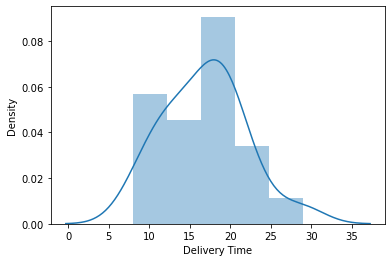

In [39]:
sns.distplot(data['Delivery Time'])

C:\Users\pearl\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

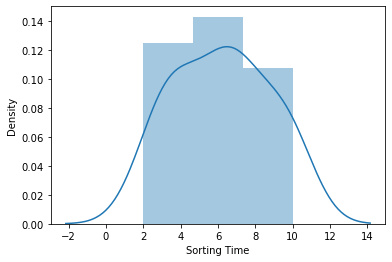

In [40]:
sns.distplot(data['Sorting Time'])

In [41]:
import statsmodels.formula.api as smf

In [42]:
data1=data.rename(columns={'Delivery Time':'DT','Sorting Time':'ST'})

In [43]:
model = smf.ols("DT~ST",data = data1).fit()

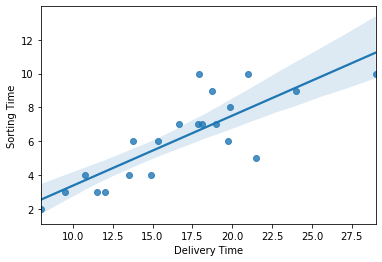

In [44]:
sns.regplot(x="Delivery Time", y="Sorting Time", data=data);

In [45]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

In [46]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


In [47]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [48]:
newdata=pd.Series([10,6,9,10]) 

In [49]:
data1_pred=pd.DataFrame(newdata,columns=['ST'])

In [50]:
model.predict(data1_pred)

0    23.072933
1    16.476853
2    21.423913
3    23.072933
dtype: float64